# Steps to build a model:
1) Reading, understanding and cleaning the data

2) Visualizing the data

3) Building and training the model

4) Error Analysis

5) Prediction on the test data or Evaluating the model

# 1) Reading, understanding and cleaning the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
gases = pd.read_csv("AirQualityData.csv")
gases

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air Quality
0,Amaravati,21-06-2018,18.81,55.66,3.91,11.70,9.49,11.32,1.01,5.53,62.72,0.23,0.26,0.10,88.0,Satisfactory
1,Amaravati,22-06-2018,18.69,50.06,3.48,12.39,9.52,12.21,0.81,7.62,68.32,0.38,0.20,NaN,101.0,Moderate
2,Amaravati,23-06-2018,17.85,43.47,3.35,11.42,8.88,11.67,1.05,6.86,63.17,0.41,0.24,NaN,80.0,Satisfactory
3,Amaravati,24-06-2018,18.09,45.11,3.00,7.26,6.39,9.25,1.00,6.14,64.60,0.40,0.24,0.10,89.0,Satisfactory
4,Amaravati,25-06-2018,18.93,60.89,3.85,7.40,7.15,10.94,0.55,6.76,50.27,0.43,0.26,NaN,71.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15192,Delhi,27-06-2020,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
15193,Delhi,28-06-2020,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
15194,Delhi,29-06-2020,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
15195,Delhi,30-06-2020,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [3]:
gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15197 entries, 0 to 15196
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         15197 non-null  object 
 1   Date         15197 non-null  object 
 2   PM2.5        14967 non-null  float64
 3   PM10         14868 non-null  float64
 4   NO           14946 non-null  float64
 5   NO2          14888 non-null  float64
 6   NOx          14939 non-null  float64
 7   NH3          14164 non-null  float64
 8   CO           15004 non-null  float64
 9   SO2          14663 non-null  float64
 10  O3           14687 non-null  float64
 11  Benzene      13285 non-null  float64
 12  Toluene      11633 non-null  float64
 13  Xylene       6477 non-null   float64
 14  AQI          14778 non-null  float64
 15  Air Quality  14778 non-null  object 
dtypes: float64(13), object(3)
memory usage: 1.9+ MB


In [4]:
gases["PM2.5"] = gases["PM2.5"].replace(np.NaN, gases["PM2.5"].mean())
gases["PM10"] = gases["PM10"].replace(np.NaN, gases["PM10"].mean())
gases["NO"] = gases["NO"].replace(np.NaN, gases["NO"].mean())
gases["NO2"] = gases["NO2"].replace(np.NaN, gases["NO2"].mean())
gases["NOx"] = gases["NOx"].replace(np.NaN, gases["NOx"].mean())
gases["NH3"] = gases["NH3"].replace(np.NaN, gases["NH3"].mean())
gases["CO"] = gases["CO"].replace(np.NaN, gases["CO"].mean())
gases["SO2"] = gases["SO2"].replace(np.NaN, gases["SO2"].mean())
gases["O3"] = gases["O3"].replace(np.NaN, gases["O3"].mean())
gases["Benzene"] = gases["Benzene"].replace(np.NaN, gases["Benzene"].mean())
gases["Toluene"] = gases["Toluene"].replace(np.NaN, gases["Toluene"].mean())
gases["Xylene"] = gases["Xylene"].replace(np.NaN, gases["Xylene"].mean())
gases["AQI"] = gases["AQI"].replace(np.NaN, gases["AQI"].mean())
gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15197 entries, 0 to 15196
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         15197 non-null  object 
 1   Date         15197 non-null  object 
 2   PM2.5        15197 non-null  float64
 3   PM10         15197 non-null  float64
 4   NO           15197 non-null  float64
 5   NO2          15197 non-null  float64
 6   NOx          15197 non-null  float64
 7   NH3          15197 non-null  float64
 8   CO           15197 non-null  float64
 9   SO2          15197 non-null  float64
 10  O3           15197 non-null  float64
 11  Benzene      15197 non-null  float64
 12  Toluene      15197 non-null  float64
 13  Xylene       15197 non-null  float64
 14  AQI          15197 non-null  float64
 15  Air Quality  14778 non-null  object 
dtypes: float64(13), object(3)
memory usage: 1.9+ MB


In [5]:
gases.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,15197.000000,15197.000000,15197.000000,15197.000000,15197.000000,15197.000000,15197.000000,15197.000000,15197.000000,15197.000000,15197.000000,15197.000000,15197.000000
mean,55.779727,116.198049,18.349335,28.986978,33.304023,21.074134,1.105639,11.597300,35.008191,3.705889,8.633821,2.592984,133.433550
std,51.032434,88.541757,23.564084,20.821876,30.698497,17.132856,1.313215,8.796701,21.168512,17.754958,18.587045,2.926359,89.642653
min,0.040000,0.180000,0.060000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,14.000000
25%,24.570000,56.280000,5.230000,13.010000,13.910000,9.610000,0.580000,5.990000,20.160000,0.440000,1.690000,1.900000,74.000000
50%,42.410000,95.190000,10.500000,25.420000,25.990000,16.960000,0.870000,9.620000,32.520000,1.880000,7.390000,2.592984,106.000000
75%,67.240000,143.500000,20.570000,39.350000,41.170000,27.200000,1.250000,13.840000,45.450000,3.705889,8.633821,2.592984,152.000000
max,917.770000,985.000000,273.390000,241.340000,293.100000,207.140000,47.930000,79.830000,257.730000,455.030000,454.850000,137.450000,869.000000


# 2) Visualizing the data

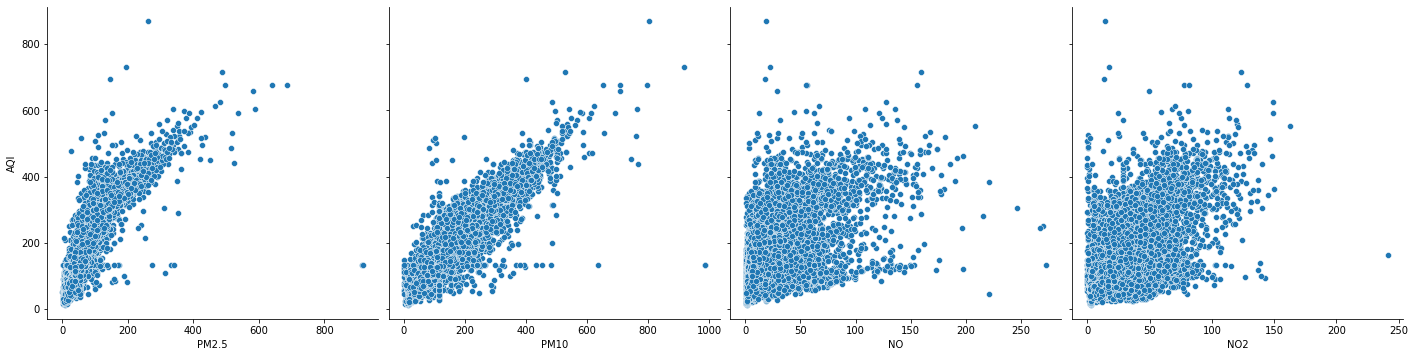

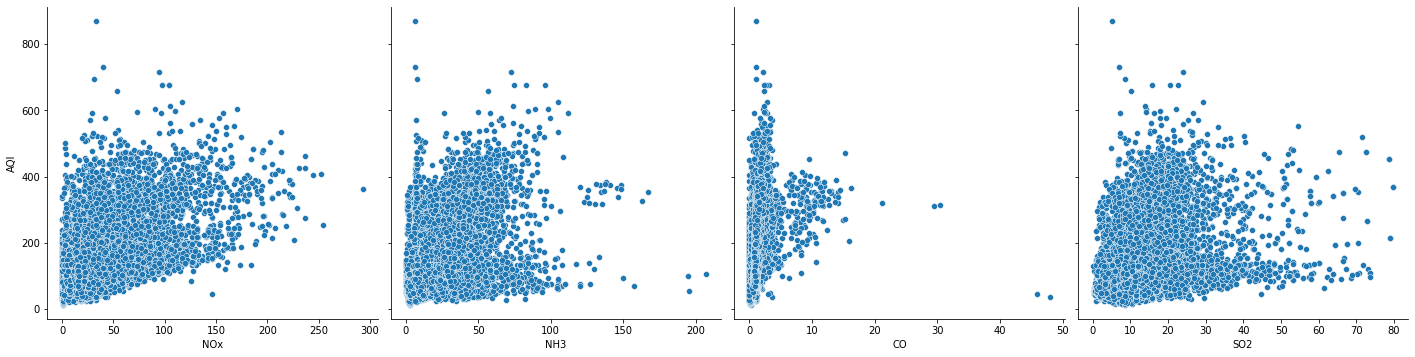

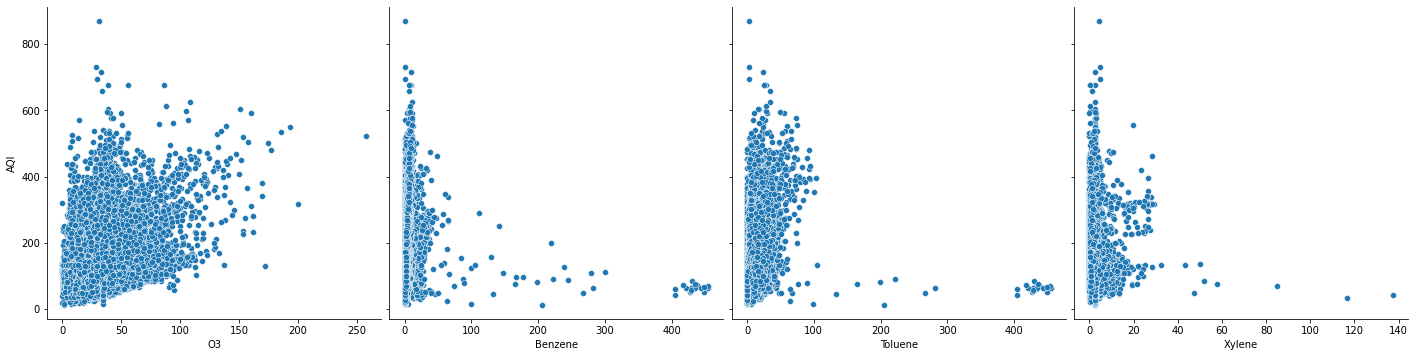

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(gases, x_vars = ['PM2.5', 'PM10', 'NO', 'NO2'], y_vars = 'AQI', size = 5, aspect = 1, kind = 'scatter')
sb.pairplot(gases, x_vars = ['NOx', 'NH3','CO', 'SO2'], y_vars = 'AQI', size = 5, aspect = 1, kind = 'scatter')
sb.pairplot(gases, x_vars = [ 'O3', 'Benzene', 'Toluene', 'Xylene'], y_vars = 'AQI', size = 5, aspect = 1, kind = 'scatter')
plt.show()

[]

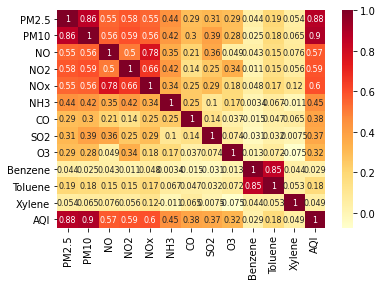

In [7]:
sb.heatmap(gases.corr(), cmap = 'YlOrRd', annot = True, annot_kws={'size': 8})
plt.plot()

# 3) Building and training the model
 Steps:
   
a) Create x and y

b) Create Train and Test data

c) Building and Training the model

# a) Create x and y

In [8]:
x = gases[['PM2.5', 'PM10', 'NOx']]
y = gases['AQI']

# b) Create Train and Test data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state=100)

In [10]:
x_train

,PM2.5,PM10,NOx
937,46.380000,102.860000,48.190000
8699,68.660000,150.990000,49.180000
10629,16.310000,34.900000,55.480000
2368,13.380000,100.600000,19.880000
10126,55.779727,116.198049,33.304023
...,...,...,...
12119,69.500000,104.080000,49.380000
8039,29.440000,76.060000,88.900000
14147,39.600000,116.198049,8.360000
6936,34.100000,87.220000,33.304023


In [11]:
y_train 

937      134.00000
8699     145.00000
10629     57.00000
2368      69.00000
10126    133.43355
           ...    
12119    119.00000
8039     100.00000
14147     66.00000
6936      76.00000
5640     164.00000
Name: AQI, Length: 10637, dtype: float64

In [12]:
x_test

,PM2.5,PM10,NOx
3943,82.67,157.490000,43.18
14103,116.12,116.198049,4.82
540,25.74,46.380000,8.46
13543,204.72,391.900000,180.15
3738,26.60,77.510000,27.33
...,...,...,...
13574,290.66,418.920000,118.66
8579,30.31,52.580000,24.58
2204,79.75,69.560000,31.65
9001,49.52,116.690000,81.23


In [13]:
y_test

3943     111.0
14103    149.0
540       54.0
13543    326.0
3738     115.0
         ...  
13574    399.0
8579      58.0
2204     100.0
9001     111.0
6363      91.0
Name: AQI, Length: 4560, dtype: float64

# c) Building and Training the model

In [14]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const    25.973408
PM2.5     0.682896
PM10      0.506916
NOx       0.308341
dtype: float64

In [16]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 2.124e+04
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:25:37   Log-Likelihood:                -52525.
No. Observations:               10637   AIC:                         1.051e+05
Df Residuals:                   10633   BIC:                         1.051e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.9734      0.559     46.502      0.000      24.879      27.068
PM2.5          0.6829      0.013     52.883      0.000       0.658       0.708
PM10           0.5069      0.008     67.396      0.000       0.492       0.522
NOx            0.3083      0.013     23.654      0.000       0.283       0.334
==============================================================================
Omnibus:                     7362.006   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3188044.000
Skew:                          -2.110   Prob(JB):                         0.00
Kurtosis:                      87.707   Cond. No.                         284.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4) Residual(Error) Analysis

In [17]:
y_train_pred = lr.predict(x_train_sm)
err = (y_train - y_train_pred)
mean_err = np.mean(err)
mean_err

-1.0675041225566428e-13

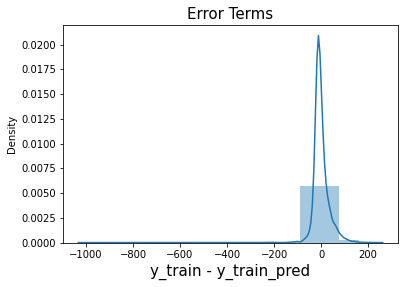

In [18]:
sb.distplot(err, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

# 5) Prediction on the test data or Evaluating the model

In [19]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_sm)
y_test_pred

3943     175.576750
14103    165.660115
540       69.670469
13543    419.983792
3738      91.856443
            ...    
13574    473.408850
8579      80.904637
2204     125.454411
9001     143.988955
6363     120.652487
Length: 4560, dtype: float64

In [20]:
from sklearn.metrics import r2_score
r_sq = 100 * r2_score(y_test, y_test_pred)
print("Accuracy of model to make prediction on unseen data : ", r_sq, "%")

Accuracy of model to make prediction on unseen data :  84.10747379216727 %


In [22]:
# Taking input from user
PM2   = input('Enter PM2.5 value\n')
PM10  = input('Enter PM10 value\n')
NOx   = input('Enter NOx value\n')
# Make DataFrame for model
input_variables = pd.DataFrame([[PM2, PM10, NOx]], columns=['PM2.5', 'PM10', 'NOx'], dtype=float, index=['input'])
# Get the model's prediction
prediction = model.predict(input_variables)[0]
print(prediction)

Enter PM2.5 value
59.52
Enter PM10 value
308.65
Enter NOx value
23.86
230.43596541802108


In [21]:
# Save the model
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))